In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
cols = ['PercentPoached','HDI','GDP per capita','Forest Area','Agri %land area']
cols2 = ['Value','Combo']

In [61]:
pred_east = pd.read_csv('pred_eastern.csv', usecols=cols)
rmse_east = pd.read_csv('rmse_eastern.csv', usecols=cols2)

pred_west = pd.read_csv('pred_west.csv', usecols=cols)
rmse_west = pd.read_csv('rmse_west.csv', usecols=cols2)

pred_cen = pd.read_csv('pred_central.csv', usecols=cols)
rmse_cen = pd.read_csv('rmse_central.csv', usecols=cols2)

pred_south = pd.read_csv('pred_southern.csv', usecols=cols)
rmse_south = pd.read_csv('rmse_southern.csv', usecols=cols2)

In [10]:
pred_east

,Agri %land area,Forest Area,GDP per capita,HDI,PercentPoached
0,NaN,NaN,NaN,0.510549,0.516752
1,NaN,NaN,NaN,0.514439,0.493774
2,NaN,NaN,NaN,0.517157,0.480092
3,NaN,NaN,NaN,0.519003,0.471989
4,NaN,NaN,NaN,0.520229,0.467215
...,...,...,...,...,...
697,47.353512,NaN,874.723415,NaN,0.602682
698,47.353506,NaN,874.727350,NaN,0.602683
699,47.353501,NaN,874.730855,NaN,0.602683
700,47.353496,NaN,874.733977,NaN,0.602684


In [25]:
702/13

54.0

In [12]:
df_mi = pd.read_csv('merged_indicators2.csv')

cols = ['Region', 'Country','PercentPoached','Year','GCB','HDI','Forest Area','Agri %land area','GDP per capita']
df_mi = df_mi[cols]
df_mid = df_mi[df_mi['Region'].notna()]
df_mi.drop(columns='Region',inplace=True)

region_dict = dict(zip(df_mid.Country, df_mid.Region))

df_mi['Region'] = df_mi['Country'].map(region_dict)

df_mi = df_mi[df_mi['Year']>=2000]

df_mia = df_mi.groupby(['Country']).mean()

df_mi.set_index('Country', inplace=True)

df_mi['Forest Area'] = df_mi['Forest Area'].fillna(df_mia['Forest Area'])
df_mi['GCB'] = df_mi['GCB'].fillna(df_mia['GCB'])
df_mi['HDI'] = df_mi['HDI'].fillna(df_mia['HDI'])
df_mi['Agri %land area'] = df_mi['Agri %land area'].fillna(df_mia['Agri %land area'])
df_mi['GDP per capita'] = df_mi['GDP per capita'].fillna(df_mia['GDP per capita'])
df_mi['PercentPoached'] = df_mi['PercentPoached'].fillna(df_mia['PercentPoached'])

df_mi.reset_index(inplace=True)

df_mi3 = df_mi[df_mi['PercentPoached']>0]
df_mi3 = df_mi3[df_mi3['PercentPoached']<1]

In [41]:
df_mi3a = df_mi3[df_mi3['Region']=='Central Africa']
df_mi3a = df_mi3a[df_mi3a['Year']>2014]
df_mi3a = df_mi3a[['PercentPoached','HDI','Forest Area','Agri %land area','GDP per capita', 'Year']]

In [42]:
df_mi3a

,PercentPoached,HDI,Forest Area,Agri %land area,GDP per capita,Year
20,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
21,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
22,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
23,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
24,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
25,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
26,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
27,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
28,0.510357,0.548000,39.800000,20.625754,1326.969277,2015
32,0.433333,0.362000,35.600000,8.154355,377.271254,2015


In [63]:
rmse_east['loc']='east'
rmse_west['loc']='west'
rmse_cen['loc']='cen'
rmse_south['loc']='south'

rmse_tot = pd.concat([rmse_east,rmse_west,rmse_cen,rmse_south])

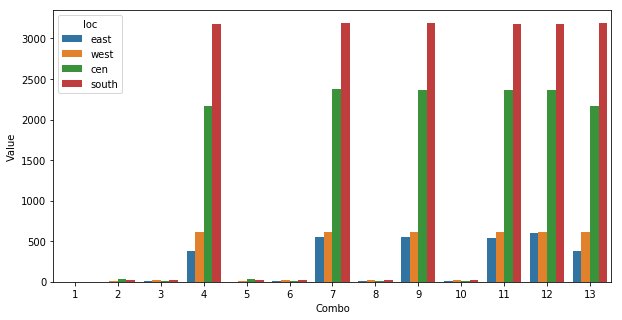

In [76]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x="Combo", y="Value", hue="loc", data=rmse_tot)

In [70]:
combos = [1,2,3,5,6,8,10]
rmse_tot1 = rmse_tot[rmse_tot['Combo'].isin(combos)]

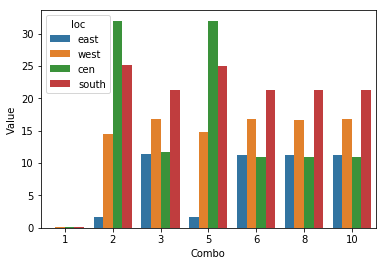

In [72]:
ax = sns.barplot(x="Combo", y="Value", hue="loc", data=rmse_tot1)

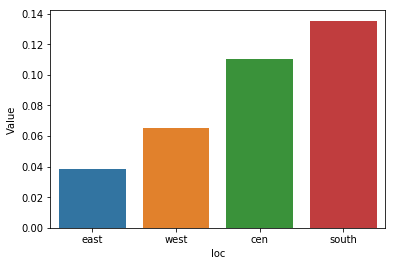

In [73]:
rmse_tot2 = rmse_tot[rmse_tot['Combo']==1]
ax = sns.barplot(x="loc", y="Value", data=rmse_tot2)